### Modeles Stochastiques en Finance MAP 552
#### Computer Problem Set 2.1 
### The Black-Scholes hedging strategy
##### GNABEYEU MBIADA Emmanuel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm 

#### 1. Build a program which produces a sample of N = 1000 copies of the discrete path ${S_{t_i},i = 0,...,n}.$ 

Take T = 1.5, $S_0 = 100$, σ = 0.3, r = 0.05, use three values of μ: 0.05, 0.02 and 0.45.

We firstly simulate sample paths $(W_{t_i})$ of the brownian motion $W_t$.

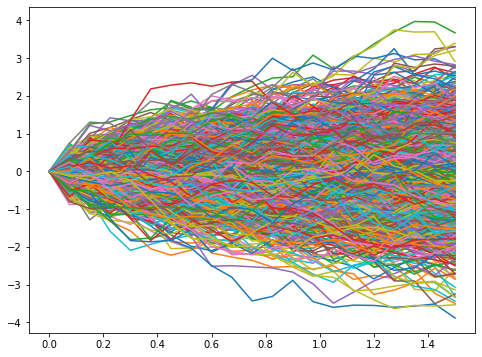

In [2]:
def forward_simul_sample(n,d):
    # increments
    dt = T/n
    dB= np.sqrt(dt) * np.random.normal(size=(n,d))
    B0= np.zeros(shape=(1,d))
    B=np.concatenate((B0, np.cumsum(dB, axis=0)), axis=0)
    return B

n=20
n_samples=1000
T=1.5
times = np.linspace(0,T,n+1)
dt=times[1]-times[0]

W=forward_simul_sample(n,d=n_samples)
plt.figure(figsize=(8,6))
plt.plot(times,W)
plt.show()

In [3]:
def processus(n, T, mu, sigma,n_samples, S0=100):
    t_vals = np.linspace(0, T, n+1, endpoint=True)
    Wt =forward_simul_sample(n,n_samples)
    exponents = ((mu - 0.5*sigma*sigma)*t_vals).reshape(-1,1)+sigma*Wt
    return S0*np.exp(exponents)

Text(0, 0.5, 'Price $S_t$')

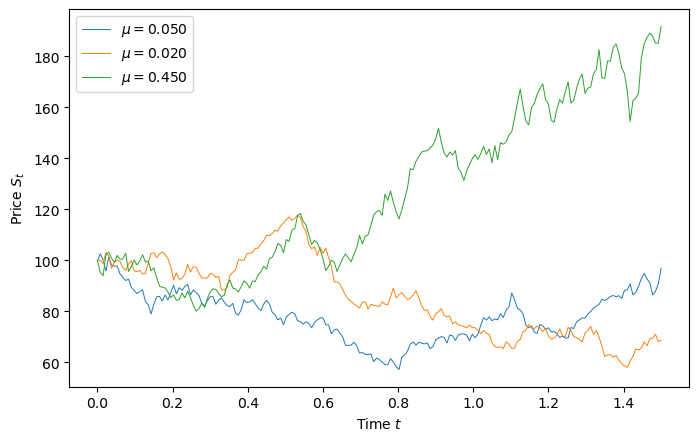

In [4]:
n = 200
n_samples = 1000
S0 = 100
sigma = 0.3
fig, ax = plt.subplots(1,1,figsize=(8,5),dpi=100)
t_vals = np.linspace(0, T, n+1, endpoint=True)
mu_val_list = [0.05, 0.02, 0.45]

all_sample_data = []

for mu in mu_val_list:
    sample_data= processus(n, T, mu,sigma,n_samples)
    all_sample_data .append(sample_data)
    graph_traj = sample_data[:,-1] 
    ax.plot(t_vals, graph_traj, linewidth=0.7,
            label=r"$\mu = %.3f$" % mu)

all_sample_data = np.array(all_sample_data)
ax.legend()
ax.set_xlabel("Time $t$")
ax.set_ylabel("Price $S_t$")

Compute the corresponding sample mean and variance. Comment the results.

Text(0, 0.5, 'Price $S_t$')

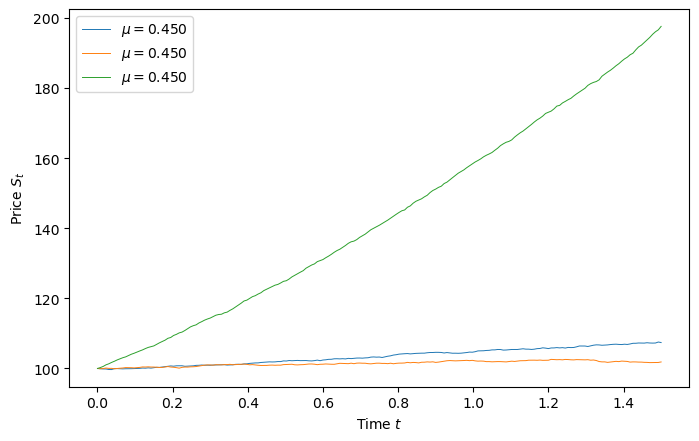

In [5]:
mean=np.mean(all_sample_data, axis=2)
fig, ax = plt.subplots(1,1,figsize=(8,5),dpi=100)
for i in range(3):
    graph_traj=mean[i,:]
    ax.plot(t_vals, graph_traj, linewidth=0.7,
            label=r"$\mu = %.3f$" % mu)
ax.legend()
ax.set_xlabel("Time $t$")
ax.set_ylabel("Price $S_t$")

Text(0, 0.5, 'Price $S_t$')

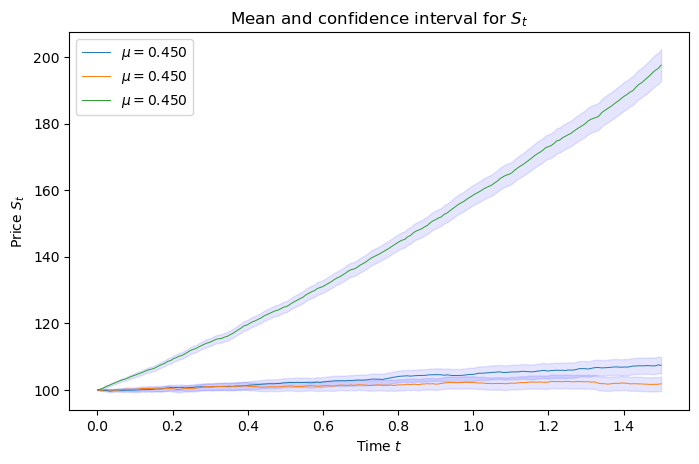

In [6]:
var=np.var(all_sample_data, axis=2)

bs_std = np.sqrt(var/n_samples)
bs_band_size = 1.96*bs_std 

UCL=mean+bs_band_size
LCL=mean-bs_band_size
fig, ax = plt.subplots(1,1,figsize=(8,5),dpi=100)
for i in range(3):
    graph_traj=mean[i,:]
    ax.plot(t_vals, graph_traj, linewidth=0.7,
            label=r"$\mu = %.3f$" % mu)
    ax.fill_between(t_vals, UCL[i,:], LCL[i,:], color='b', alpha=.1)

ax.legend()
plt.title("Mean and confidence interval for $S_t$")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Price $S_t$")

In [7]:
for i, mu in enumerate(mu_val_list):
    print("Drift value: %.3f" % mu)
    mean = np.mean(all_sample_data[i,:,-1])
    variance = np.var(all_sample_data[i,:,-1], ddof=1)
    print(" | sample mean S_T: %.4f" % mean)
    print(" | sample variance S_T: %.4f" % variance)

Drift value: 0.050
 | sample mean S_T: 78.4779
 | sample variance S_T: 94.5585
Drift value: 0.020
 | sample mean S_T: 85.6163
 | sample variance S_T: 237.0348
Drift value: 0.450
 | sample mean S_T: 126.1575
 | sample variance S_T: 1034.1384


**Comment of the results:**
When the drift is high, so is the mean of $W_T$, but also greater is the variance. 
We can prove this by writing the formulae of the expectation and the variance .

In fact $\mathbb{E}(S_T)= exp((\mu-\frac{\sigma^2}{2})T)\mathbb{E}(\sigma W_T)$ and
$Var(S_T)=exp((2\mu-\sigma^2)T)Var(\sigma W_T)$

#### 2. Denote:

$ e^{−rT}X_T^n(K): = BS(S_0,K,T)+ \sum_{i = 1}^{n} \Delta_{t^n_{i−1}}(K) (e^{−rt^n_i}S_{t^n_i} −  e^{−rt^n_{i−1}} S_{t^n_{i−1}}) $

Let's compute the no-arbitrage price of a European call option on an underlying asset with price process ${S_t, t ≥0}$ is given by:

In [8]:
def Compute_BS(S0, K, T, sigma, r):
    s = S0
    k = K*np.exp(-r*T)
    v = sigma*sigma*T
    a = np.log(s/k)/np.sqrt(v)
    d_ = a - 0.5*np.sqrt(v)
    d = a + 0.5*np.sqrt(v)
    return S0*norm.cdf(d) - k*norm.cdf(d_)

Let's define $Δ_t(K)$, the corresponding optimal hedging strategy which consists in holding ∆t shares of the underlying asset at each time t:

In [9]:
def Compute_Delta(S, K, T, t, sigma, r=0.05):
    s = S0
    k = K*np.exp(-r*(T-t))
    v = sigma*sigma*(T-t)
    d = np.log(s/k)/np.sqrt(v) + 0.5*np.sqrt(v)
    return norm.cdf(d)

(a) Simulate a sample of N = 1000 copies of $X_T^n$ for each value of μ. 
Use the values of K ∈ {100 ± i, i = 0, . . . , 20}.

In [10]:
def Compute_X_tn(n, T, K, S0, mu, sigma, r=0.05):
    BS = Compute_BS(S0, K, T, sigma, r)
    
    t_vals = np.linspace(0, T, n+1, endpoint=True)
    t_vals_ = t_vals[:-1]
    t_vals = t_vals[1:]
    deltas = Compute_Delta(S0, K, T, t_vals_, sigma, r)
    St = processus(n, T, mu, sigma,n_samples,S0)
    St_ = St[:-1]
    St = St[1:]
    
    b = BS  + np.sum(deltas.reshape(-1,1)*(np.exp(-r*t_vals).reshape(-1,1)*St - np.exp(-r*t_vals_).reshape(-1,1)*St_), axis=0)

    return np.exp(r*T)*b

In [11]:
n_samples = 1000
n = 200
S0 = 100
r=0.05
sigma = 0.3
t_vals = np.linspace(0, T, n+1, endpoint=True)
mu_val_list = [0.05, 0.02, 0.45]
K_val_list = list(range(80,121))

In [12]:
all_sample_data = []
# Computing samples for different values of K
print('')
for K in K_val_list:
    K_sample_data = []
    # Computing for differents values of mu 
    for mu in mu_val_list:
        K_sample_data.append(Compute_X_tn(n, T, K, S0, mu, sigma))
    all_sample_data.append(K_sample_data)

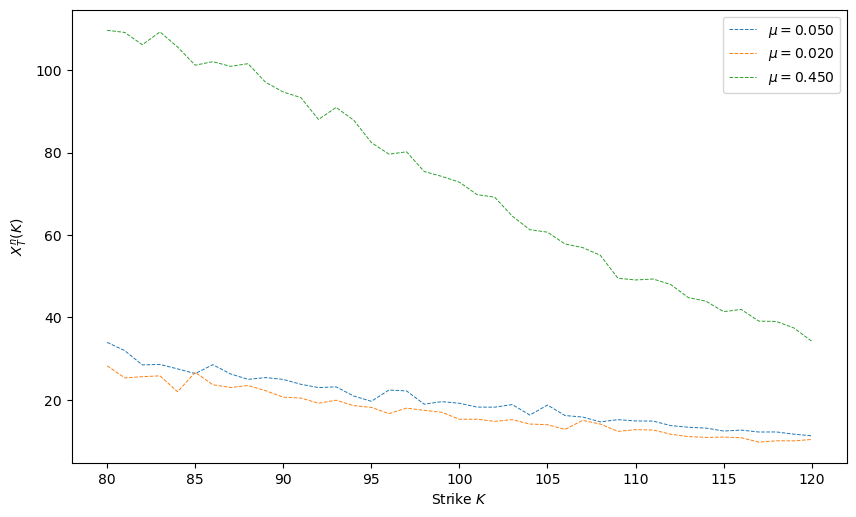

In [13]:
all_sample_data = np.array(all_sample_data)

mean_ = all_sample_data.mean(axis=2)

fig, ax = plt.subplots(1,1,figsize=(10,6),dpi=100)
ax.set_xlabel("Strike $K$")
ax.set_ylabel("$X_T^n(K)$")

for i, mu in enumerate(mu_val_list):
    ax.plot(K_val_list, mean_[:,i], linestyle='--', label=r"$\mu=%.3f$" % mu, linewidth=0.7)

ax.legend()

**Comments:** 
When the values of the drift is higher (which means higher mean asset price and variance at time T or higher expected return on the asset at T), the portfolio value decrease quickly $X_{T}^n(K)$ with the strike K.

(b) Compute the corresponding Profit and Loss:
$PL^n_T(K):=X_T^n(K)−(S_T −K)^+.$

In [48]:
def Compute_profit_loss(n, T, K, S0, mu, sigma, r=0.05):
    BS = Compute_BS(S0, K, T, sigma, r)
    t_vals = np.linspace(0, T, n+1, endpoint=True)
    t_vals_ = t_vals[:-1]
    t_vals = t_vals[1:]
    deltas = Compute_Delta(S0, K, T, t_vals_, sigma, r)
    St = processus(n, T, mu, sigma,n_samples, S0)
    Sf = St[-1]
    St_ = St[:-1]
    St = St[1:]
    b = BS + np.sum(deltas.reshape(-1,1)*(np.exp(-r*t_vals).reshape(-1,1)*St - np.exp(-r*t_vals_).reshape(-1,1)*St_), axis=0)
    res = np.exp(r*T)*b
    return res - np.maximum(Sf - K, 0)

In [49]:
# Compute samples of the 
n_samples = 1000
n_val_list = [128, 512, 1024, 2048]

pl_sample_data = []
print("=== Profit and loss ===")
# Computing samples for differents values of n
for n in n_val_list:
    n_sample_data = []
    # computing for the values of K
    for K in K_val_list:
        K_sample_data = []
        for mu in mu_val_list:
            K_sample_data.append(Compute_profit_loss(n, T, K, S0, mu, sigma))
        n_sample_data.append(K_sample_data)
    pl_sample_data.append(n_sample_data)

=== Profit and loss ===


(c) For each value of μ and K, compute the sample mean and variance of $PL^n_T(K)$, and provide the corresponding plots in terms of the number of steps n and the strike K. 

In [50]:
pl_sample_data = np.array(pl_sample_data)
print(pl_sample_data.shape)

Mean_ = np.mean(pl_sample_data, axis=-1)
var_ = np.var(pl_sample_data, axis=-1, ddof=1)

(4, 41, 3, 1000)


In [51]:
Mean_.shape

(4, 41, 3)

**Let's compute the Mean of the Profit-Loss**
with different values of the drift 
μ, We compute and plot the mean of $PL^n_T(K)$ with the strike and n.

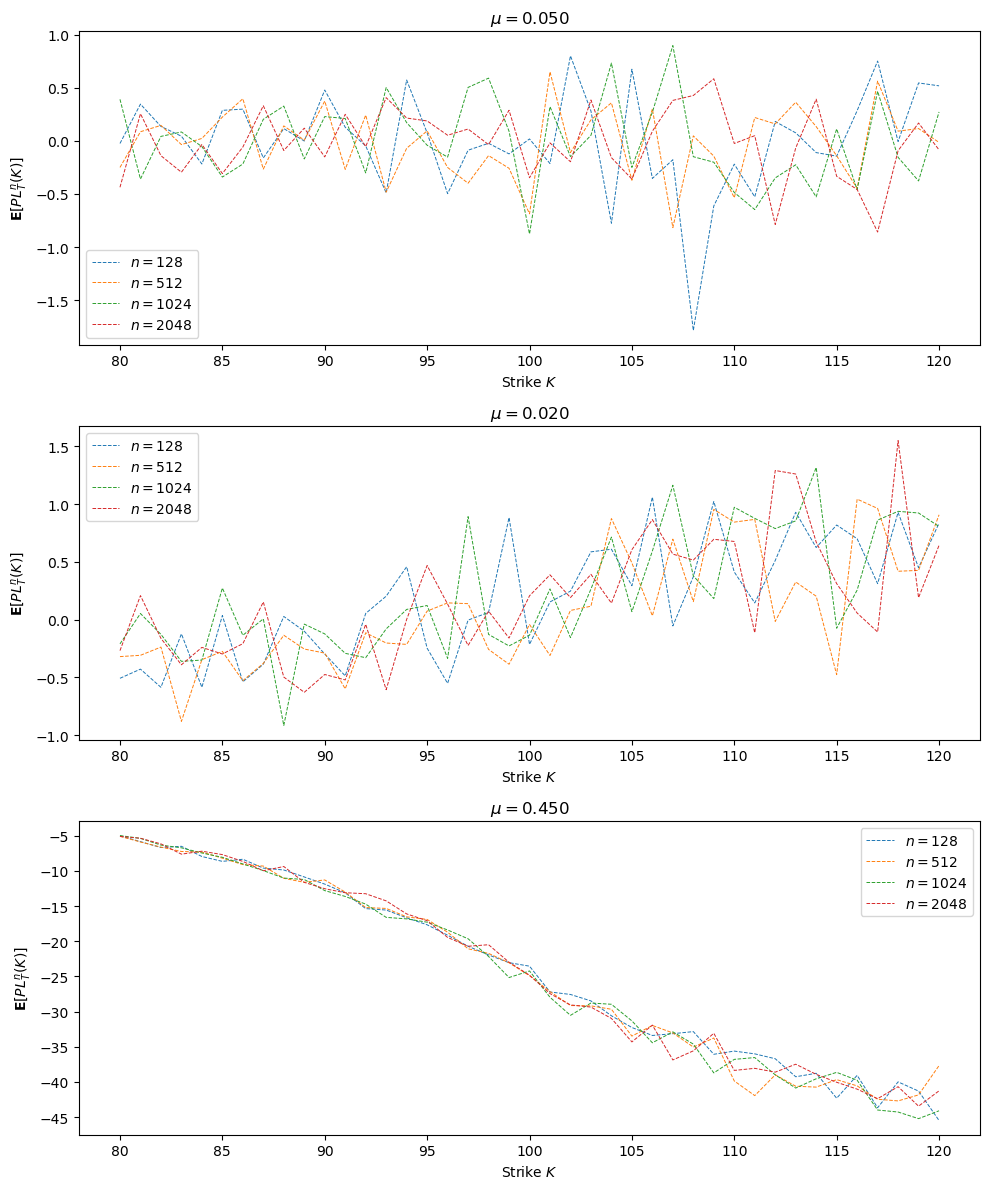

In [52]:
fig, axes = plt.subplots(3,1,figsize=(10,12),dpi=100)

for i, mu in enumerate(mu_val_list):
    for j, n in enumerate(n_val_list):
        axes[i].plot(
            K_val_list, Mean_[j,:,i],
            linestyle='--', label=r"$n=%d$" % n, linewidth=0.7)
    axes[i].set_xlabel("Strike $K$")
    axes[i].legend()
    axes[i].set_title(r"$\mu=%.3f$" % mu)
    axes[i].set_ylabel(r"$\mathbf{E}[PL_T^n(K)]$")
fig.tight_layout()

**Comments:**
A high value of the drifttend to decrease the profit-loss with respect to the strike K

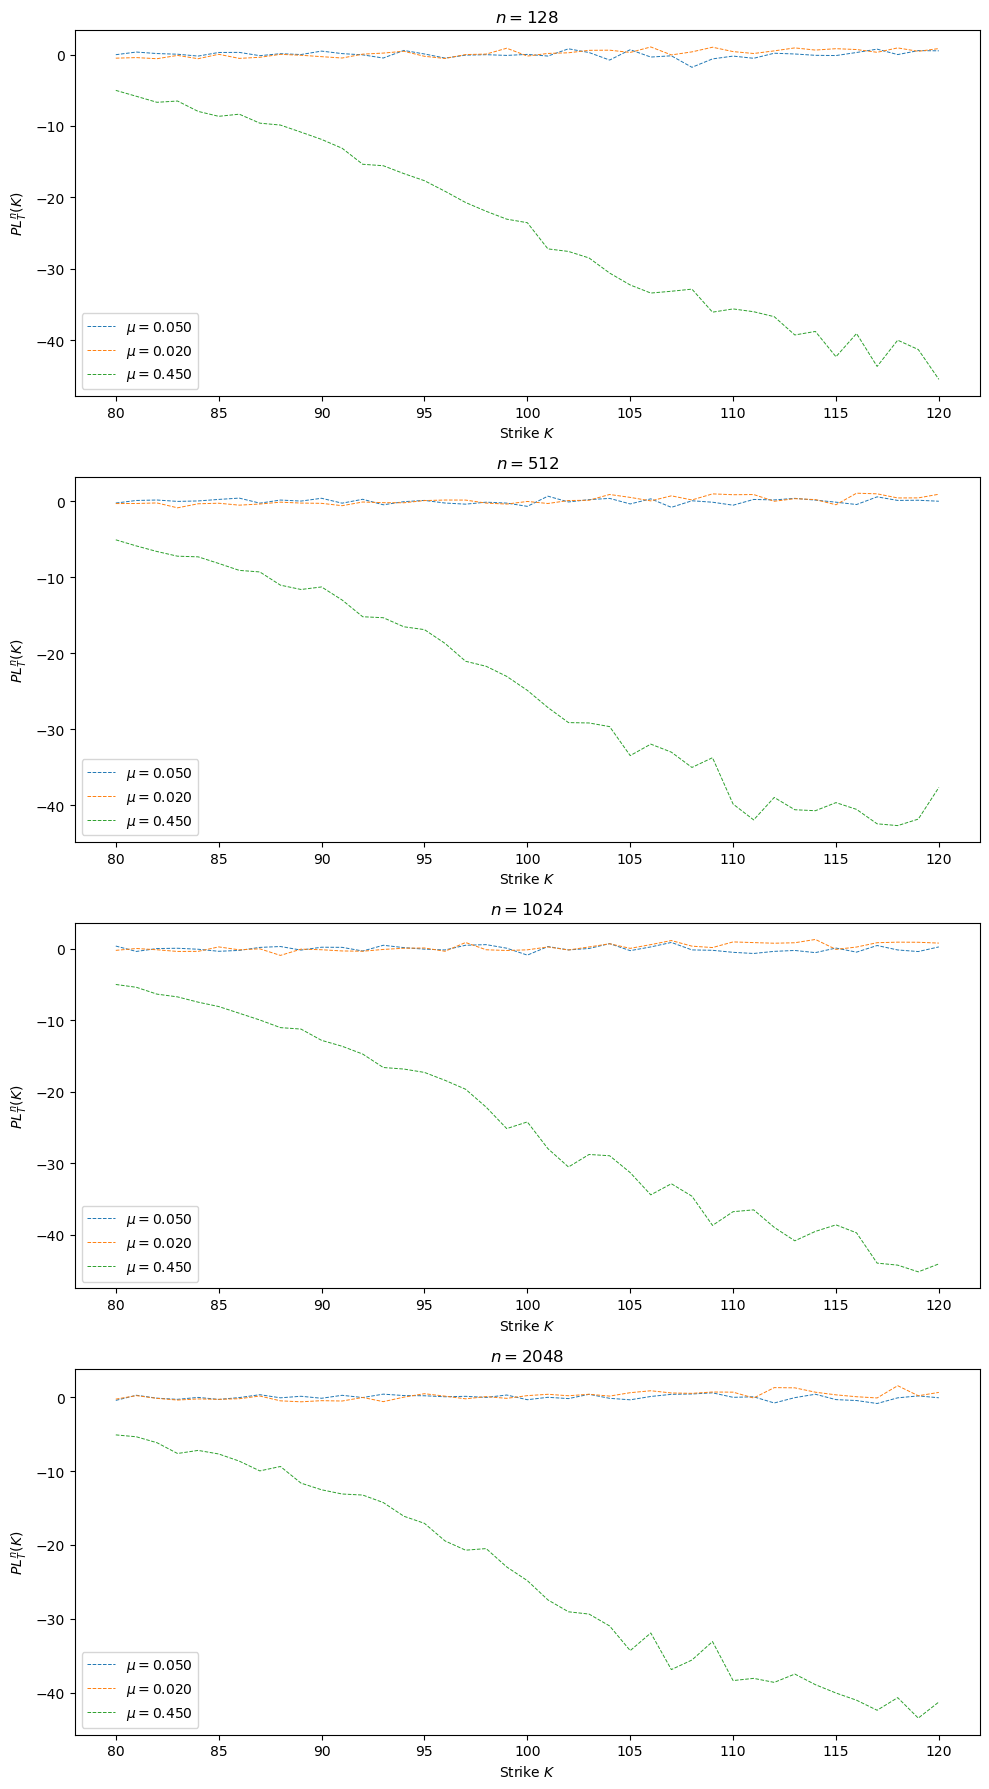

In [53]:
fig, axes = plt.subplots(len(n_val_list),1,figsize=(10,18),dpi=100)

for i, n in enumerate(n_val_list):
    for j, mu in enumerate(mu_val_list):
        axes[i].plot(
            K_val_list, Mean_[i,:,j],
            linestyle='--', label=r"$\mu=%.3f$" % mu, linewidth=0.7)
    axes[i].set_xlabel("Strike $K$")
    axes[i].legend()
    axes[i].set_title(r"$n=%d$" % n)
    axes[i].set_ylabel("$PL_T^n(K)$")
fig.tight_layout()

**Let's compute the Variance of the Profit-Loss**

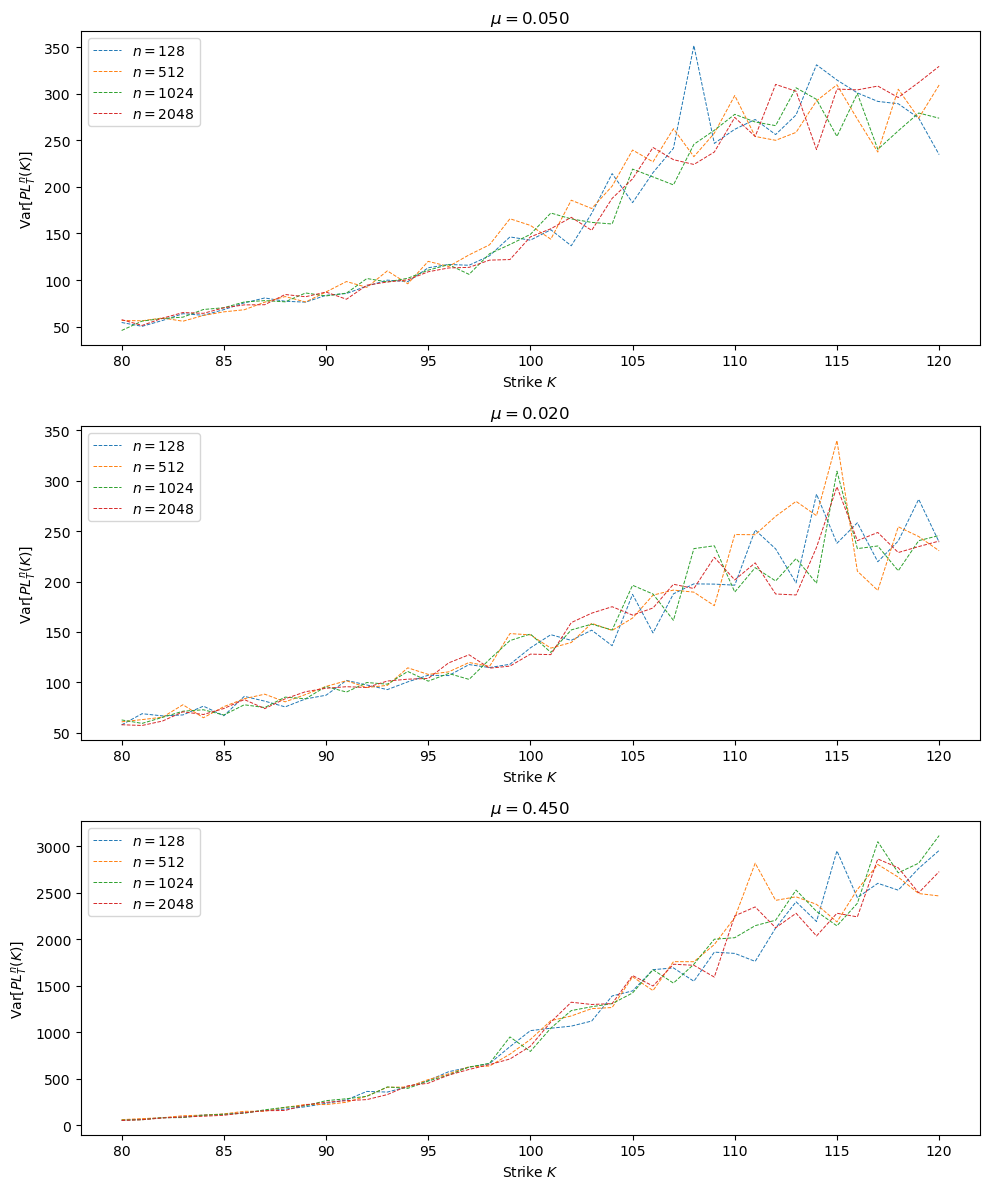

In [54]:
fig, axes = plt.subplots(3,1,figsize=(10,12),dpi=100)

for i, mu in enumerate(mu_val_list):
    for j, n in enumerate(n_val_list):
        axes[i].plot(
            K_val_list, var_[j,:,i],
            linestyle='--', label=r"$n=%d$" % n, linewidth=0.7)
    axes[i].set_xlabel("Strike $K$")
    axes[i].legend()
    axes[i].set_title(r"$\mu=%.3f$" % mu)
    axes[i].set_ylabel(r"$\mathrm{Var}[PL_T^n(K)]$")
fig.tight_layout()

**Comment:**  The variance increases with the drift. 